<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB
None
          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   68

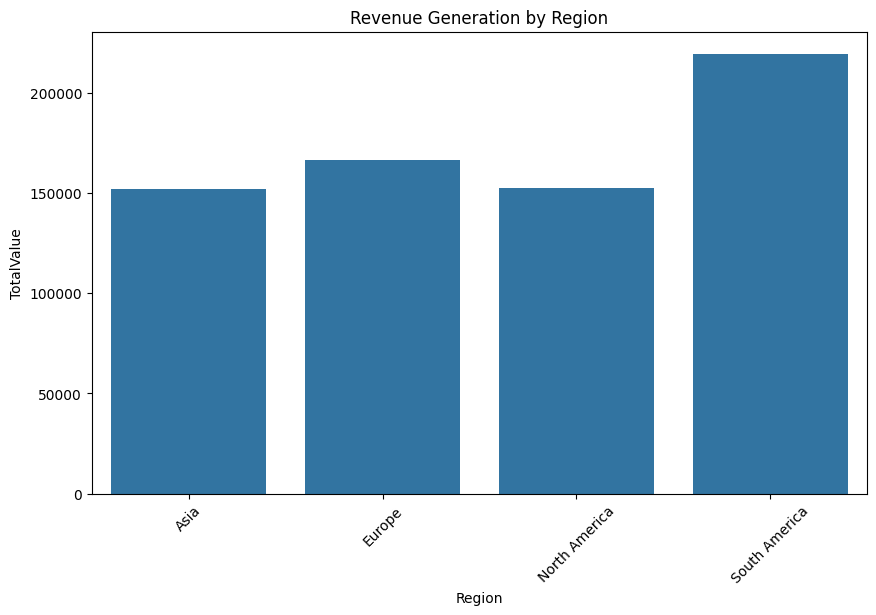

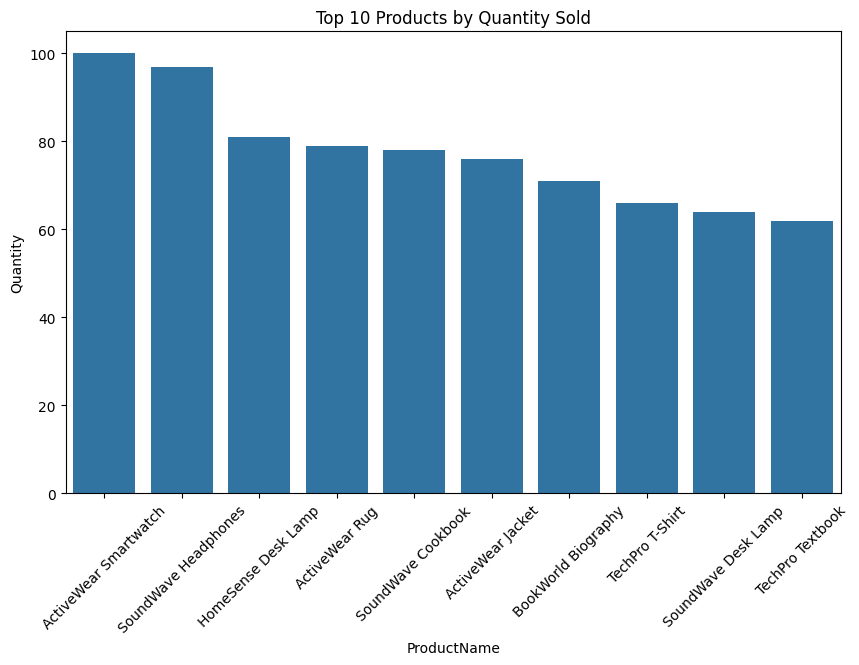

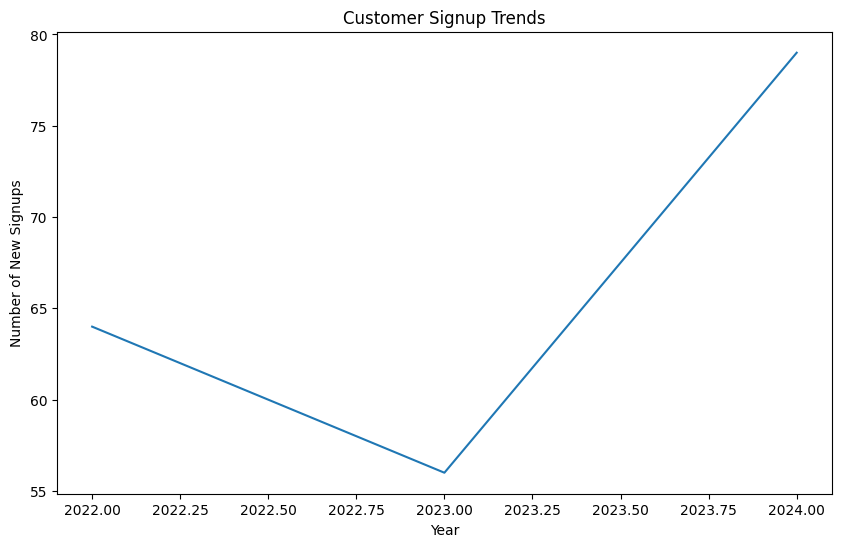

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
# Load the datasets
customer_data = pd.read_csv('Customers.csv')
product_data = pd.read_csv('Products.csv')
transaction_data = pd.read_csv('Transactions.csv')
# Merge the datasets to get a comprehensive dataset
data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Basic data exploration
print(data.info())
print(data.describe())
print(data.isnull().sum())

# Total Revenue by Region
revenue_by_region = data.groupby('Region')['TotalValue'].sum().reset_index()
print(revenue_by_region)

# Top Products by Quantity Sold
top_products = data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10).reset_index()
print(top_products)

# Revenue Generation by Region (Visualization)
plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='TotalValue', data=revenue_by_region)
plt.title('Revenue Generation by Region')
plt.xticks(rotation=45)
plt.show()

# Visualize Top Products by Quantity Sold
plt.figure(figsize=(10,6))
sns.barplot(x='ProductName', y='Quantity', data=top_products)
plt.title('Top 10 Products by Quantity Sold')
plt.xticks(rotation=45)
plt.show()

# Customer Signup Trends over Time
data['SignupDate'] = pd.to_datetime(data['SignupDate'])
signup_trends = data.groupby(data['SignupDate'].dt.year)['CustomerID'].nunique().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(x='SignupDate', y='CustomerID', data=signup_trends)
plt.title('Customer Signup Trends')
plt.xlabel('Year')
plt.ylabel('Number of New Signups')
plt.show()
